INTRODUCTION 

This dataset contains details of 1,000 laptops, including their brand, processor speed, RAM size, storage capacity, screen size, weight, and price. It can be used to analyze laptop specifications and price trends.

IMPORT LIBARIES AND LOAD DATASET

In [1]:
#import the required libaries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score


#import dataset
df=pd.read_csv(r"C:\Data Science\data_set\Laptop_price .csv")
print(df.head(10))

    Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0    Asus         3.830296        16               512    11.185147  2.641094   
1    Acer         2.912833         4              1000    11.311372  3.260012   
2  Lenovo         3.241627         4               256    11.853023  2.029061   
3    Acer         3.806248        16               512    12.280360  4.573865   
4    Acer         3.268097        32              1000    14.990877  4.193472   
5      HP         1.881348        16               256    11.943958  4.840268   
6  Lenovo         2.940721        32               256    11.713246  4.344846   
7  Lenovo         3.016788         4               256    15.588315  2.941120   
8  Lenovo         2.560327         4               512    15.026332  2.743620   
9    Acer         3.341111        32               512    13.611945  4.093149   

          Price  
0  17395.093065  
1  31607.605919  
2   9291.023542  
3  17436.728334  
4  32917.990718  


DATA CLEANING

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [3]:
df.isna().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:

le=LabelEncoder()
df["Brand"]=le.fit_transform(df["Brand"])
df.head(10)



,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,1,3.830296,16,512,11.185147,2.641094,17395.093065
1,0,2.912833,4,1000,11.311372,3.260012,31607.605919
2,4,3.241627,4,256,11.853023,2.029061,9291.023542
3,0,3.806248,16,512,12.280360,4.573865,17436.728334
4,0,3.268097,32,1000,14.990877,4.193472,32917.990718
5,3,1.881348,16,256,11.943958,4.840268,9543.719980
6,4,2.940721,32,256,11.713246,4.344846,10390.137319
7,4,3.016788,4,256,15.588315,2.941120,9214.484506
8,4,2.560327,4,512,15.026332,2.743620,16372.175284
9,0,3.341111,32,512,13.611945,4.093149,18501.832733


EXTRACTING INDEPENDENT AND DEPENDENT VARIABLES

In [6]:

x=df[["Brand","Processor_Speed","RAM_Size","Storage_Capacity","Screen_Size","Weight"]]
x=pd.DataFrame(x)
y=df["Price"]
y=pd.DataFrame(y)


DATA VISUALIZATION BY FINDING CORREALTION BETWEEN THE DATAS

                     Brand  Processor_Speed  RAM_Size  Storage_Capacity  \
Brand             1.000000        -0.006958  0.013622         -0.008166   
Processor_Speed  -0.006958         1.000000  0.021391         -0.067576   
RAM_Size          0.013622         0.021391  1.000000          0.002111   
Storage_Capacity -0.008166        -0.067576  0.002111          1.000000   
Screen_Size      -0.031384        -0.013425 -0.036002         -0.027560   
Price            -0.008365        -0.050737  0.061237          0.997908   

                  Screen_Size     Price  
Brand               -0.031384 -0.008365  
Processor_Speed     -0.013425 -0.050737  
RAM_Size            -0.036002  0.061237  
Storage_Capacity    -0.027560  0.997908  
Screen_Size          1.000000 -0.026740  
Price               -0.026740  1.000000  


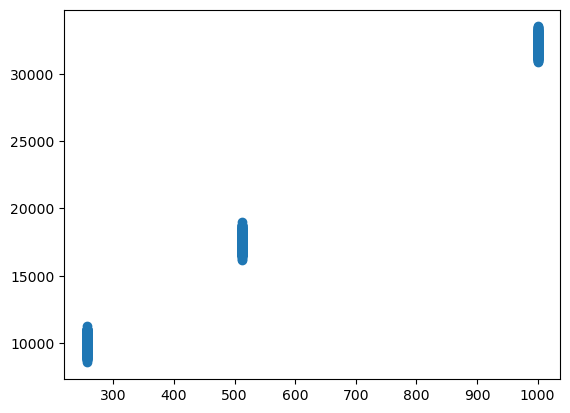

In [7]:
cor=df[["Brand","Processor_Speed","RAM_Size","Storage_Capacity","Screen_Size","Price"]].corr()
print(cor)
plt.scatter(df['Storage_Capacity'],df['Price'])
plt.show()

SPLITING DATA INTO TRAIN AND TEST DATA

In [8]:
#split the dataset into training and testing sets 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

MODEL BUILIDING AND EVALUATE PREDICTIONS 

LINEAR REGRESION

In [9]:
#create linear regression model
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [10]:
#make prediction
y_pred=model.predict(x_test)

In [11]:
#calculate evaluation metrics
print('mean absloute error:',metrics.mean_absolute_error(y_test,y_pred))
print('mean squared error:',metrics.mean_squared_error(y_test,y_pred))
print('root mean squared error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


mean absloute error: 150.57258786250688
mean squared error: 37101.3558666427
root mean squared error: 192.61712246485953


In [12]:
#check the accuracy of the model
accuracy=r2_score(y_test,y_pred)
print("accuracy is",accuracy*100,"%")

accuracy is 99.95669031175525 %


SUMMARY

This project aimed to predict the laptop specification and price trends.after processing this multi linear regression model achieved 99% accuarcy on price ..